In [20]:
import pandas as pd
import geopandas
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
montreal = pd.read_csv('./data/montreal.csv')
montreal.head()

id                          listing_url       scrape_id last_scraped  \
0  534948  https://www.airbnb.com/rooms/534948  20230902231108   2023-09-03   
1  542160  https://www.airbnb.com/rooms/542160  20230902231108   2023-09-03   
2  556742  https://www.airbnb.com/rooms/556742  20230902231108   2023-09-03   
3  564098  https://www.airbnb.com/rooms/564098  20230902231108   2023-09-03   
4   29059   https://www.airbnb.com/rooms/29059  20230902231108   2023-09-03   

        source                                               name  \
0  city scrape  Rental unit in Montreal · ★4.83 · 2 bedrooms ·...   
1  city scrape  Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...   
2  city scrape  Rental unit in Montreal · ★4.83 · 2 bedrooms ·...   
3  city scrape  Rental unit in Montreal · ★4.80 · 1 bedroom · ...   
4  city scrape  Rental unit in Montreal · ★4.67 · 1 bedroom · ...   

                                         description  \
0  <b>The space</b><br />The apartment is fully e...   
1  <b>The space</b><br />I am renting my lovely c...   
2  The building is occupied by families mostly. T...   
3  A bright and sunny upper triplex on a tree-lin...   
4  CITQ 267153<br />Lovely studio with 1 closed r...   

                               neighborhood_overview  \
0                                                NaN   
1  Le plateau Mont-Royal is in my opinion, the be...   
2  This neighborhood is our favorite, the Avenue ...   
3  Location: On the edge of the Plateau, close to...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  1610679  ...   
1  https://a0.muscache.com/pictures/29641965/040b...  2666170  ...   
2  https://a0.muscache.com/pictures/9263006/946af...  2737452  ...   
3  https://a0.muscache.com/pictures/7314398/a9b57...  2542265  ...   
4  https://a0.muscache.com/pictures/736399/fa6c31...   125031  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        5.00                   4.83                4.83   
1                        4.89                   4.68                4.78   
2                        4.94                   4.83                4.80   
3                        4.82                   4.64                4.73   
4                        4.76                   4.81                4.69   

                       license instant_bookable  \
0                          NaN                f   
1  284723, expires: 2024-06-30                f   
2                          NaN                f   
3                          NaN                f   
4  267153, expires: 2024-03-31                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              2                                           2   
2                              2                                           2   
3                              2                                           2   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.05  
1                                           0              1.70  
2                                           0              0.94  
3                                           0              0.09  
4                                           0              2.71  

[5 rows x 75 columns]

In [3]:
montreal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7933 non-null   int64  
 1   listing_url                                   7933 non-null   object 
 2   scrape_id                                     7933 non-null   int64  
 3   last_scraped                                  7933 non-null   object 
 4   source                                        7933 non-null   object 
 5   name                                          7933 non-null   object 
 6   description                                   7887 non-null   object 
 7   neighborhood_overview                         4298 non-null   object 
 8   picture_url                                   7933 non-null   object 
 9   host_id                                       7933 non-null   i

## Exploratory data analysis

In [6]:
columns_of_interest = [
    "name",
    "description",
    "listing_url",
    "host_id",
    "host_location",
    "neighbourhood",
    "neighbourhood_cleansed",
    "neighborhood_overview",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "beds",
    "amenities",
    "price",
    "minimum_nights",
    "maximum_nights",
    "availability_365",
    "number_of_reviews",
    "review_scores_rating",
]

montreal_df = montreal[columns_of_interest]

montreal_df.head()

name  \
0  Rental unit in Montreal · ★4.83 · 2 bedrooms ·...   
1  Condo in Montreal · ★4.77 · 1 bedroom · 1 bed ...   
2  Rental unit in Montreal · ★4.83 · 2 bedrooms ·...   
3  Rental unit in Montreal · ★4.80 · 1 bedroom · ...   
4  Rental unit in Montreal · ★4.67 · 1 bedroom · ...   

                                         description  \
0  <b>The space</b><br />The apartment is fully e...   
1  <b>The space</b><br />I am renting my lovely c...   
2  The building is occupied by families mostly. T...   
3  A bright and sunny upper triplex on a tree-lin...   
4  CITQ 267153<br />Lovely studio with 1 closed r...   

                           listing_url  host_id          host_location  \
0  https://www.airbnb.com/rooms/534948  1610679  Bissau, Guinea-Bissau   
1  https://www.airbnb.com/rooms/542160  2666170       Montreal, Canada   
2  https://www.airbnb.com/rooms/556742  2737452       Montreal, Canada   
3  https://www.airbnb.com/rooms/564098  2542265       Montreal, Canada   
4   https://www.airbnb.com/rooms/29059   125031       Montreal, Canada   

              neighbourhood neighbourhood_cleansed  \
0                       NaN           Le Sud-Ouest   
1  Montreal, Quebec, Canada  Le Plateau-Mont-Royal   
2  Montreal, Quebec, Canada  Le Plateau-Mont-Royal   
3  Montreal, Quebec, Canada  Le Plateau-Mont-Royal   
4                       NaN            Ville-Marie   

                               neighborhood_overview  latitude  longitude  \
0                                                NaN  45.48730  -73.57330   
1  Le plateau Mont-Royal is in my opinion, the be...  45.53666  -73.58142   
2  This neighborhood is our favorite, the Avenue ...  45.53090  -73.56854   
3  Location: On the edge of the Plateau, close to...  45.53826  -73.57070   
4                                                NaN  45.51939  -73.56482   

        property_type        room_type  beds  \
0  Entire rental unit  Entire home/apt   2.0   
1        Entire condo  Entire home/apt   1.0   
2  Entire rental unit  Entire home/apt   2.0   
3  Entire rental unit  Entire home/apt   1.0   
4  Entire rental unit  Entire home/apt   2.0   

                                           amenities    price  minimum_nights  \
0  ["Bed linens", "Outdoor dining area", "Resort ...   $88.00              31   
1  ["Shampoo", "Wifi", "Oven", "Patio or balcony"...   $91.00              31   
2  ["Bed linens", "Self check-in", "Private entra...  $101.00              31   
3  ["Bed linens", "Outdoor dining area", "Wifi", ...   $50.00              31   
4  ["Bed linens", "Booster seat high chair - avai...  $190.00              31   

   maximum_nights  availability_365  number_of_reviews  review_scores_rating  
0              62                56                  6                  4.83  
1            1125               274                192                  4.77  
2            1125               284                127                  4.83  
3            1125               140                 12                  4.80  
4              60               308                435                  4.67

<Axes: xlabel='count', ylabel='beds'>

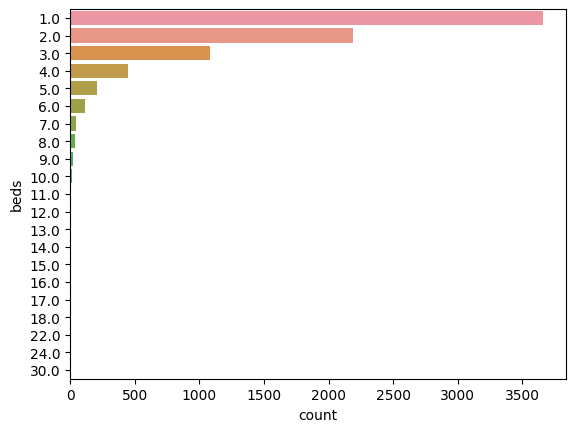

In [18]:
# Beds
sns.countplot(y='beds', data=montreal_df)

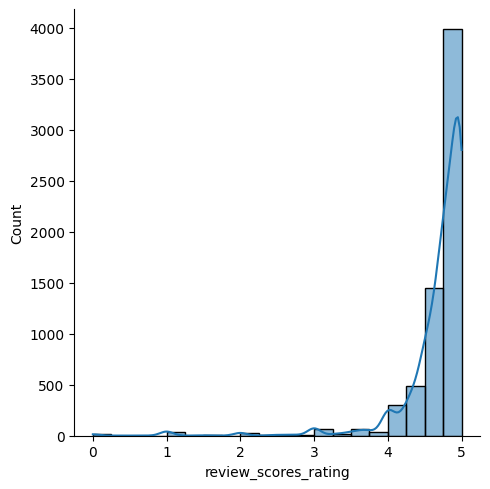

In [19]:
# Average review rating
sns.displot(montreal_df['review_scores_rating'], bins=20, kde=True)

In [22]:
# Plot latitude and longitude of listings using Folium
geometry = geopandas.points_from_xy(montreal_df.longitude, montreal_df.latitude)
crs = {'init': 'epsg:4326'}
montreal_gdf = geopandas.GeoDataFrame(montreal_df, crs=crs, geometry=geometry)

map = folium.Map(location=[45.5017, -73.5673], zoom_start=12, tiles="OpenStreetMap")
map


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

airbnb_data = pd.read_csv('/Users/moizshaikh/Documents/McGill Fall 2023/INSY 662/Project/listings 2.csv')
print(f"Initial dataset shape: {airbnb_data.shape}")

airbnb_data['price'] = airbnb_data['price'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float)

# Feature Selection & Preprocessing

selected_features = airbnb_data[['host_is_superhost', 'neighbourhood_cleansed', 'room_type', 'accommodates', 
                                 'minimum_nights', 'availability_60', 'number_of_reviews', 
                                 'review_scores_rating', 'reviews_per_month', 'host_since']].copy()

# Drop rows with missing values
cleaned_data = selected_features.dropna()
print(f"Data shape after dropping rows with missing values: {cleaned_data.shape}")

cleaned_data = cleaned_data.copy()

# Encoding the 'host_is_superhost' column to binary
cleaned_data['host_is_superhost'] = cleaned_data['host_is_superhost'].map({'f': 0, 't': 1})
# One-hot encode the 'neighbourhood_cleansed' and 'room_type' columns
cleaned_data = pd.get_dummies(cleaned_data, columns=['neighbourhood_cleansed', 'room_type'], drop_first=True)
# Convert the 'host_since' column into number of years since the host joined
cleaned_data['years_since_hosted'] = (pd.to_datetime('2023-10-05') - pd.to_datetime(cleaned_data['host_since'])).dt.days / 365
cleaned_data.drop('host_since', axis=1, inplace=True)

# Remove outliers using IQR method with correct indexing
def remove_outliers_iqr(df):
    non_outliers = df.copy()
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))
        non_outliers = non_outliers.loc[filter]
    return non_outliers

data_no_outliers = remove_outliers_iqr(cleaned_data)
print(f"Data shape after removing outliers: {data_no_outliers.shape}")

# Model Building using Random Forest and 5-Fold Cross Validation

# Define the features (X) and target variable (y)
X = data_no_outliers
y = airbnb_data.loc[data_no_outliers.index, 'price']

# Set up 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Lists to store performance metrics for each fold
mae_scores = []
mse_scores = []
r2_scores = []

# Training & Evaluation using 5-Fold Cross Validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest model
    rf.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = rf.predict(X_test)
    
    # Calculate and store the performance metrics
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calculate average performance metrics
avg_mae = sum(mae_scores) / 5
avg_mse = sum(mse_scores) / 5
avg_r2 = sum(r2_scores) / 5

print(f"\nAverage Performance Metrics after 5-Fold Cross Validation:")
print(f"Mean Absolute Error (MAE): ${avg_mae:.2f}")
print(f"Mean Squared Error (MSE): {avg_mse:.2f}")
print(f"R-squared: {avg_r2:.4f}")






from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None] + list(np.arange(5, 31, 5)),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2),
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1,  
    random_state=42
)

# Fit Random Search to the data
random_search.fit(X, y)

# Print the best hyperparameters found
print(f"Best hyperparameters:\n{random_search.best_params_}")

# Extract the best estimator (model with best hyperparameters)

best_rf = random_search.best_estimator_

if best_rf is None:
    raise ValueError("Random search did not yield a best estimator. Please ensure the search completed successfully.")

# Lists to store performance metrics for each fold in 5-Fold Cross Validation
mae_scores = []
mse_scores = []
r2_scores = []

# Training & Evaluation using 5-Fold Cross Validation with Best Hyperparameters

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the Random Forest model with the best hyperparameters
    best_rf.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = best_rf.predict(X_test)
    
    # Calculate and store the performance metrics
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Calculate average performance metrics
avg_mae = sum(mae_scores) / 5
avg_mse = sum(mse_scores) / 5
avg_r2 = sum(r2_scores) / 5

print(f"\nAverage Performance Metrics after 5-Fold Cross Validation using Best Hyperparameters:")
print(f"Mean Absolute Error (MAE): ${avg_mae:.2f}")
print(f"Mean Squared Error (MSE): {avg_mse:.2f}")
print(f"R-squared: {avg_r2:.4f}")


import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the residuals using the best_rf model and the entire dataset
y_pred = best_rf.predict(X)
residuals = y - y_pred

# 2. Plot the residuals
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# 3. Extract and visualize feature importances
feature_importances = best_rf.feature_importances_
features = X.columns

# Sort the features based on importance
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 12))
plt.barh(features[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()



